In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from Q1 import construct_splines, make_func

%matplotlib inline

In [2]:
fx_mapping = [(0,1),(1,1),(2,1),(3,-1),(4,-1),(5,-1)]

In [3]:
def construct_linear_splines(fx_mapping):
    
    """ takes in a sequence of (x,y) points and for each section between two points calculates a linear spline
    """
    n_splines = len(fx_mapping) - 1    # number of splines
    x = [item[0] for item in fx_mapping]    # get x values
    y = [item[1] for item in fx_mapping]    # get y values
    
    # create a structured array to store spline coefficients and section limits
    splines = np.zeros(n_splines, dtype=[("start", np.float64), ("end", np.float64), ("coefs",np.float64, 2)])
    
    # calculate coefficients using predefined, well known formulas
    for i in range(n_splines):
        
        c1 = (y[i+1]-y[i])/(x[i+1]-x[i])
        c2 = y[i] - c1*x[i]
        
        splines[i]["start"] = x[i]
        splines[i]["end"] = x[i+1]
        splines[i]["coefs"] = [c1,c2]
        
    return splines

In [7]:
def construct_hermite_splines(fx_mapping):
    
    """ takes in a sequence of (x,y) points and for each section between two points calculates a hermite spline
    """
    n_points = len(fx_mapping)    # number of points
    n_splines = n_points - 1    # number of splines
    x = [item[0] for item in fx_mapping]    # get x values
    y = [item[1] for item in fx_mapping]    # get y values
    
    # create a structured array to store spline coefficients and section limits
    splines = np.zeros(n_splines, dtype=[("start", np.float64), ("end", np.float64), ("coefs",np.float64, 4)])
    
    tension = 0.5    # as defined in the instructions
    
    # for each point calculate a derivative value (store in v) - this value will be later used to calculate all coefficients
    v = np.zeros(n_points)
    # set the first and last values of v manually
    v[0] = (y[1] - y[0]) / (x[1] - x[0])
    v[-1] = (y[-1] - y[-2]) / (x[-1] - x[-2])
    
    # set the rest of values in v
    for i in range(1,n_splines-1):
        v[i] = tension*(y[i + 1] - y[i - 1])
    
    # calculate coefficients using predefined, well known formulas
    for i in range(n_splines):
            
        a = 2*y[i] + v[i] - 2*y[i + 1] + v[i + 1]
        b = -3*y[i] - 2*v[i] + 3*y[i+1] - v[i+1]
        c = v[i]
        d = y[i]
        
        splines[i]["start"] = x[i]
        splines[i]["end"] = x[i+1]
        splines[i]["coefs"] = [a,b,c,d]
        
    return splines

In [13]:
def plot_splines(fx_mapping):
    
    """ calculates splines using the following methods: hermite, cubic and linear.
        plots all splines together
    """
    
    # calculate splines
    splines = construct_splines(fx_mapping)
    lin_splines = construct_linear_splines(fx_mapping)
    hermite_splines = construct_hermite_splines(fx_mapping)
    
    colors = ["red","blue","green"]    # different color for each method
    
    plt.figure(figsize=(16,9))
    n_splines = len(splines)    # number of sections

    for i in range(n_splines):
        
        spl = splines[i]
        lin_spl = lin_splines[i]
        hermite_spl = hermite_splines[i]
        
        start = spl["start"]
        end = spl["end"]
        spl_index = np.where(splines==spl)[0][0]

        x = np.arange(start,end,0.001)    # set section dots for plotting
        f = make_func(spl["coefs"])
        f1 = make_func(lin_spl["coefs"])
        
        t = np.arange(0,1,0.001)    # set section dots for hermite
        f2 = make_func(hermite_spl["coefs"])

        plt.plot(x, f(x), c=colors[0])
        plt.plot(x, f1(x), c=colors[1])
        plt.plot(x, f2(t), c=colors[2])

    # set legend
    lines = [Line2D([0], [0], color=c, linewidth=1.5, linestyle="-") for c in colors]
    labels = ["cubic spline","linear spline", "hermite spline"]
    plt.legend(lines, labels, prop={'size': 15})
    plt.show()
#     plt.savefig("fig3.png")

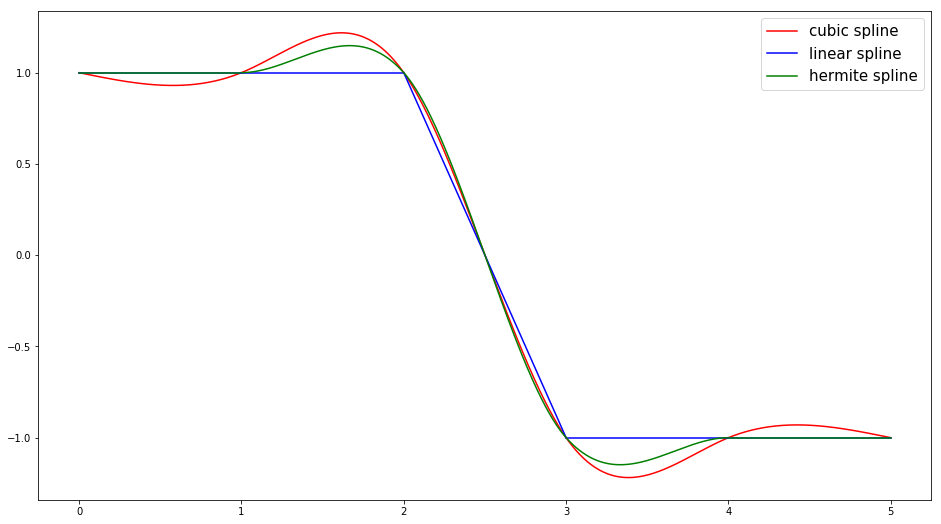

In [14]:
plot_splines(fx_mapping)